In [3]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

'2019-01-28 10:59:45.056840'

In [4]:
import pandas as pd
import os

In [295]:
# files = [f for f in os.listdir('') if 'csv' in f]
# files

# root = '/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/'
root = "/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers"

for path, subdirs, files in os.walk(root):
    for name in files:
        if 'csv' in name and 'Flow' in name:
            print(os.path.join(path, name))
            river = pd.read_csv(os.path.join(path, name))
            try:
                river['Date'] = pd.to_datetime(river['Date'])
            except:
                print(river.columns)
            try:
                river['Date'] = pd.to_datetime(river['date'])
            except:
                pass    
            river['day'] = river['Date'].dt.day
            river['month'] = river['Date'].dt.month
            river['year'] = river['Date'].dt.year
            river=river[(river['year']>1995) & (river['year']<2019)]
            res = pd.DataFrame({'Date':pd.date_range(start='1/1/1996', end='31/12/2018')})
            res = res.merge(river, left_on='Date', right_on='Date', how='outer')
            res[['Date','Flow, CFS']].to_csv("data/"+name.split("/")[-1])
            

/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Rouge_R/Flow_Rouge_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Portage_R/Flow_Portage_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Buffalo_R/Flow_Buffalo_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Raisin_R/Flow_Raisin_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Grand_OH_R/Flow_Grand_OH_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Cattaraugus_R/Flow_Cattaraugus_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Conneaut_R/Flow_Conneaut_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Chagrin_R/Flow_Chagrin_R_CFS.csv
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US

In [296]:
root = 'data/'
res_an = pd.DataFrame(columns=['hyear']).set_index('hyear')
for path, subdirs, files in os.walk(root):
    for name in files:
        if 'csv' in name and 'BaseFlow' in name:
            print(os.path.join(path, name))
            river = pd.read_csv(os.path.join(path, name))
            river_an = river.groupby(['hyear']).mean()
            river_an['baseflow'] = river_an['baseflow']*0.028316847
            river_an['flow'] = river_an['flow']*0.028316847
            river_an = river_an[['baseflow', 'flow']]
#             river_an = river_an[['baseflow']]
            river_an = river_an.rename(index=str, columns={'baseflow': name[9:-7]+'baseflow', 'flow': name[9:-7]+'flow'})
            res_an = res_an.merge(river_an, left_index=True, right_index=True, how='outer')

data/BaseFlow_Huron_OH_R_CFS.csv
data/BaseFlow_Huron_MI_R_CFS.csv
data/BaseFlow_Cattaraugus_R_CFS.csv
data/BaseFlow_Grand_R_CFS.csv
data/BaseFlow_Turkey_R_CFS.csv
data/BaseFlow_Nanticoke_R_CFS.csv
data/BaseFlow_Clinton_R_CFS.csv
data/BaseFlow_Sandusky_R_CFS.csv
data/BaseFlow_Black_OH_R_CFS.csv
data/BaseFlow_Kettle_R_CFS.csv
data/BaseFlow_Grand_OH_R_CFS.csv
data/BaseFlow_Cuyahoga_R_CFS.csv
data/BaseFlow_St_Clair_R_CFS.csv
data/BaseFlow_Conneaut_R_CFS.csv
data/BaseFlow_Buffalo_R_CFS.csv
data/BaseFlow_Sydenham_R_CFS.csv
data/BaseFlow_Lynn_R_CFS.csv
data/BaseFlow_Black_R_MI_CFS.csv
data/BaseFlow_Maumee_R_CFS.csv
data/BaseFlow_Ruscom_R_CFS.csv
data/BaseFlow_Canard_R_CFS.csv
data/BaseFlow_Chagrin_R_CFS.csv
data/BaseFlow_Portage_R_CFS.csv
data/BaseFlow_Big_R_CFS.csv
data/BaseFlow_Thames_R_CFS.csv
data/BaseFlow_Raisin_R_CFS.csv
data/BaseFlow_Vermilion_R_CFS.csv
data/BaseFlow_Detroit_R_CFS.csv
data/BaseFlow_Belle_R_CFS.csv
data/BaseFlow_Rouge_R_CFS.csv
data/BaseFlow_Big_Otter_R_CFS.csv
data/Bas

In [297]:
res_an = res_an.loc['2003':'2017']

In [298]:
# res_an.T.to_csv('Canada_Annual_baseflow_cms.csv')

In [299]:
res_an.index = res_an.index.map(int)

Huron OH river


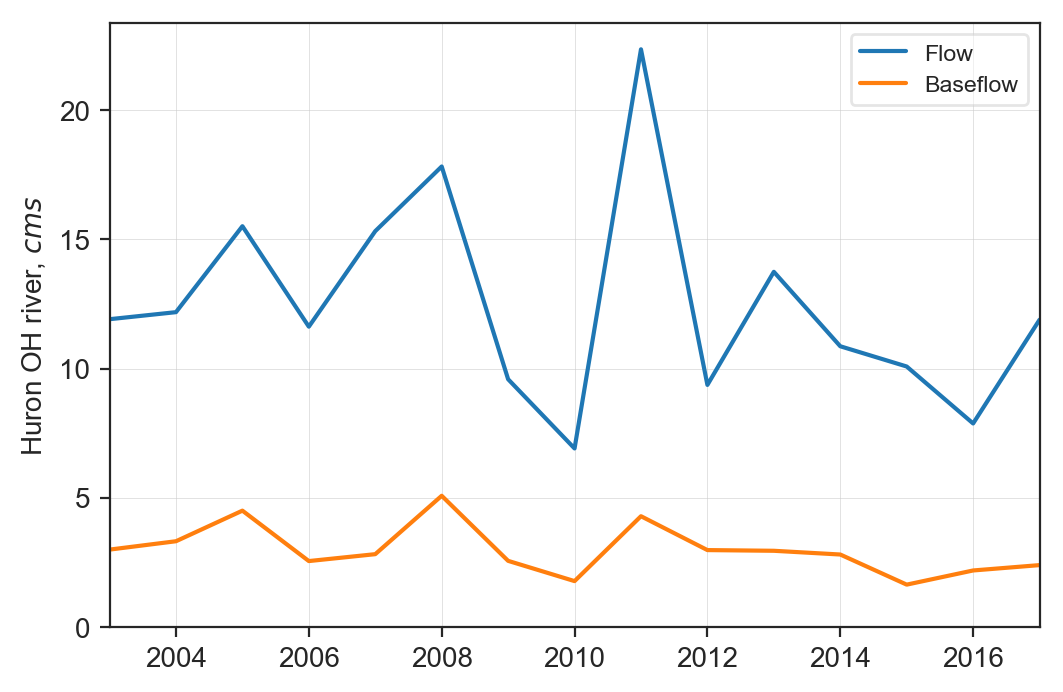

Huron MI river


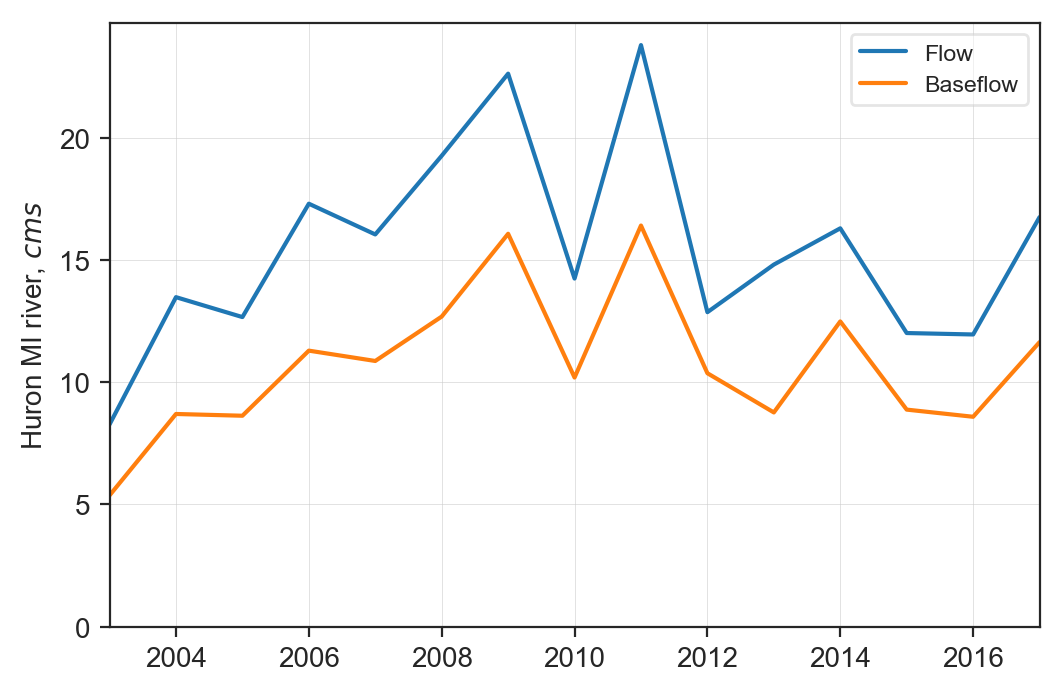

Cattaraugus river


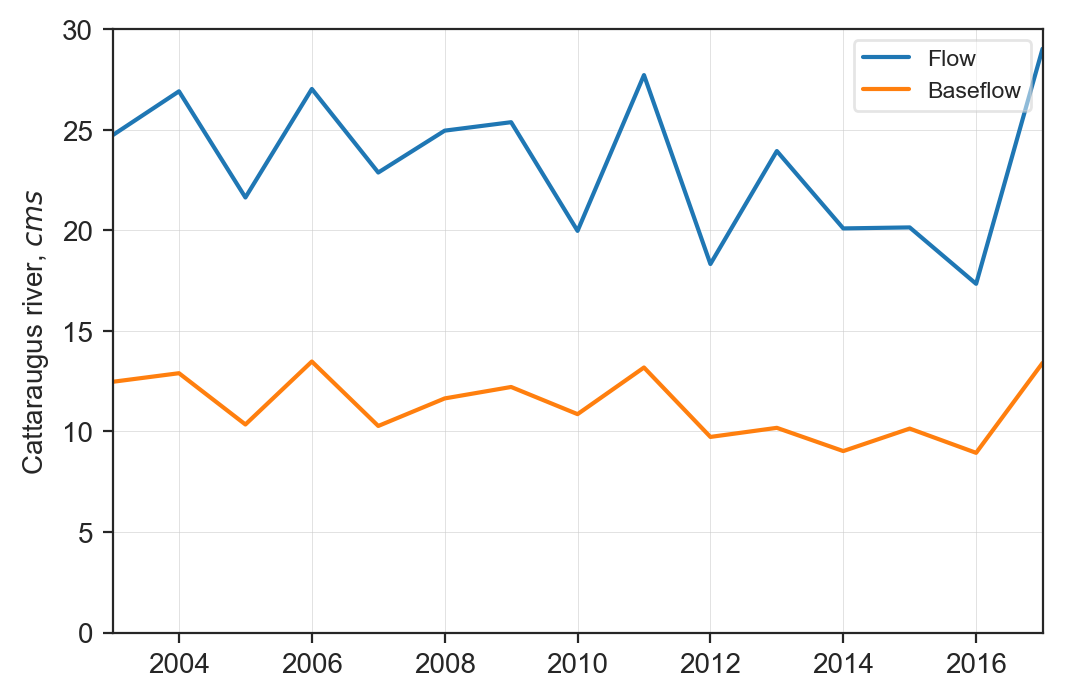

Grand river


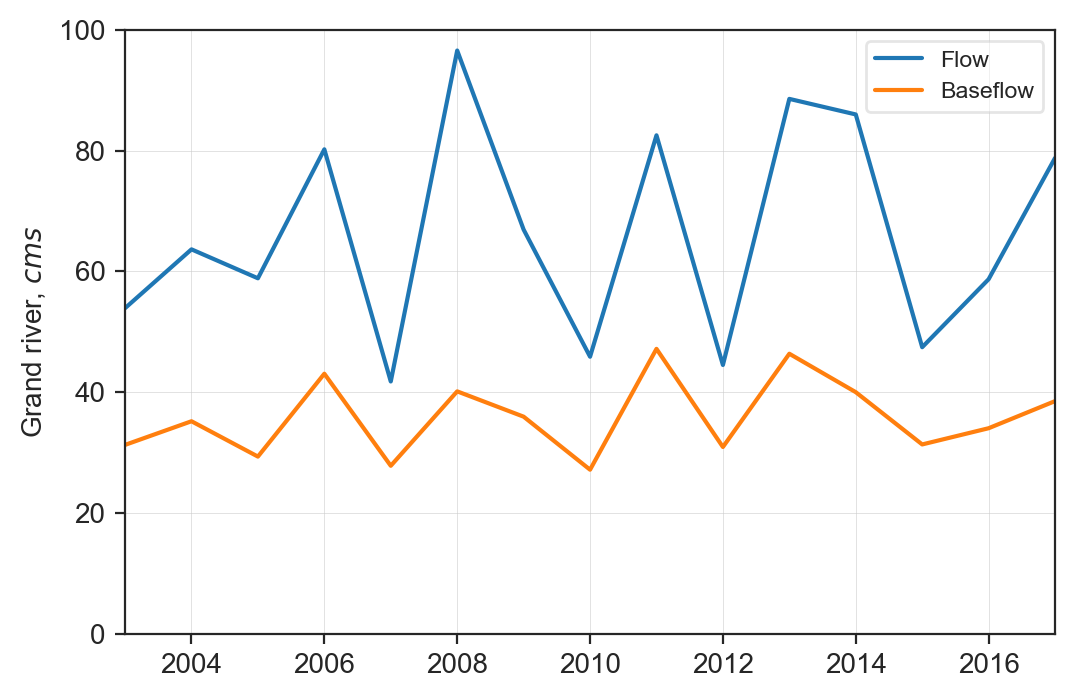

Turkey river


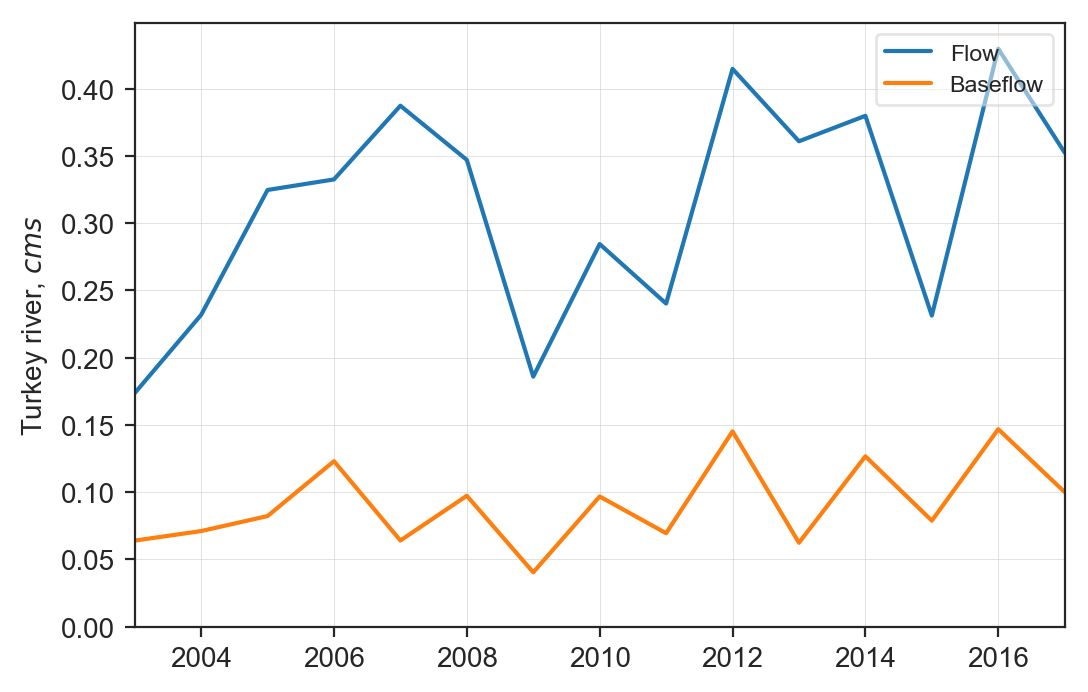

Nanticoke river


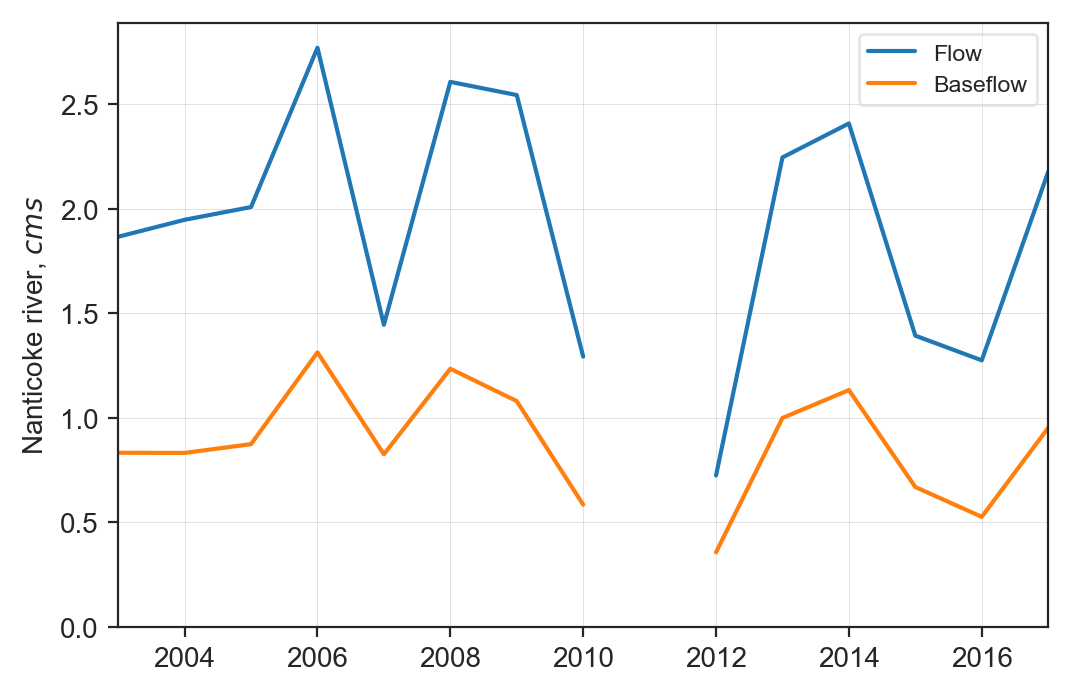

Clinton river


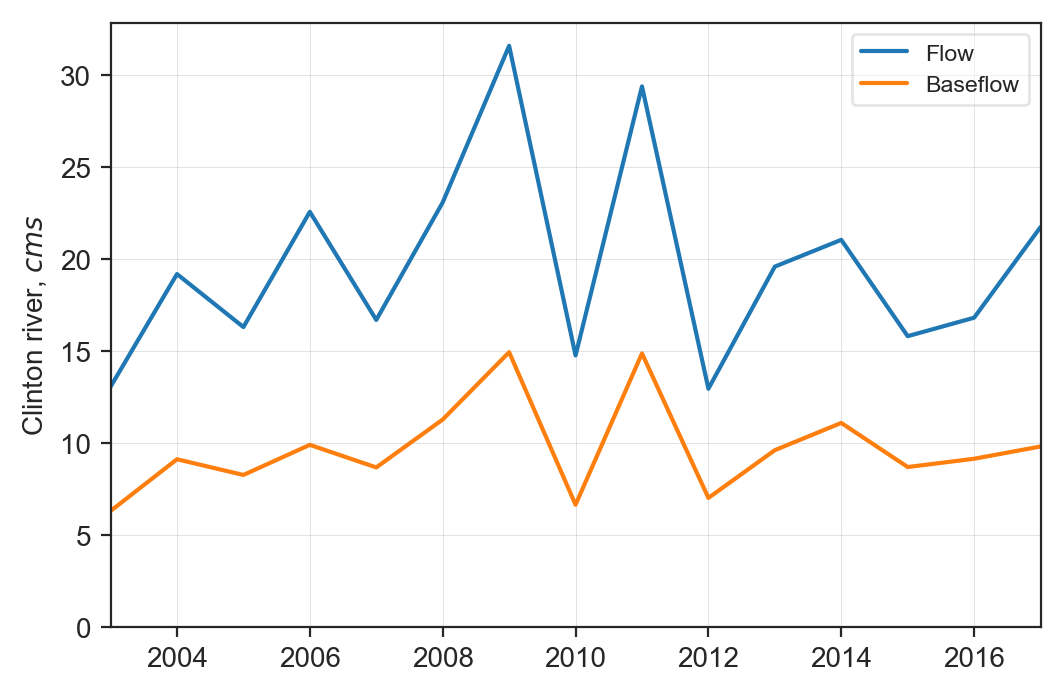

Sandusky river


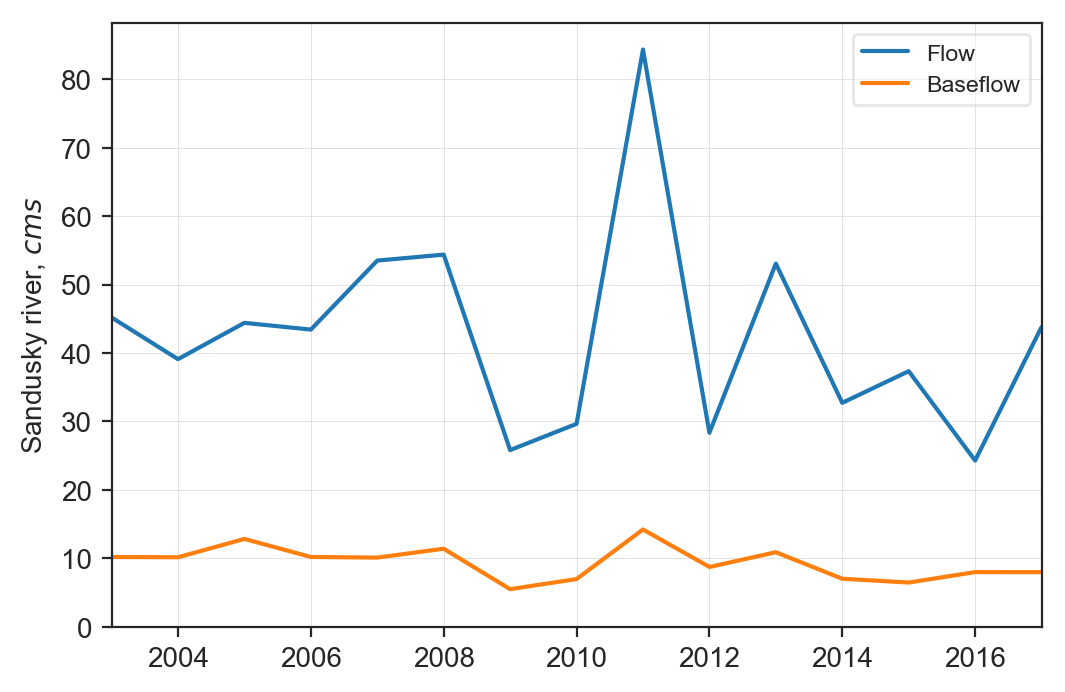

Black OH river


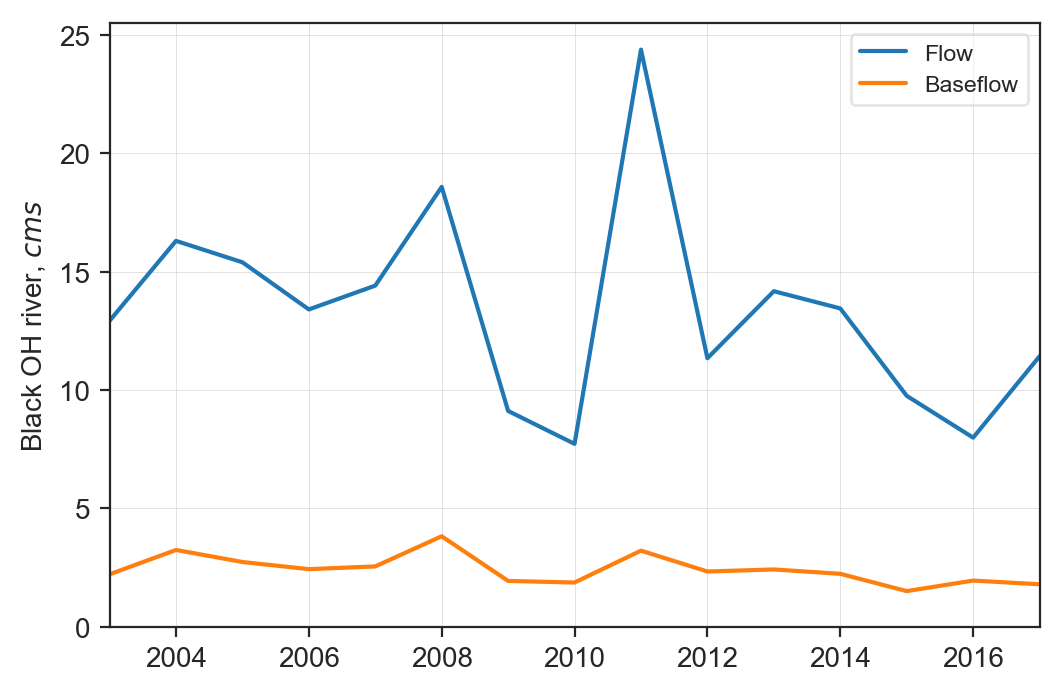

Kettle river


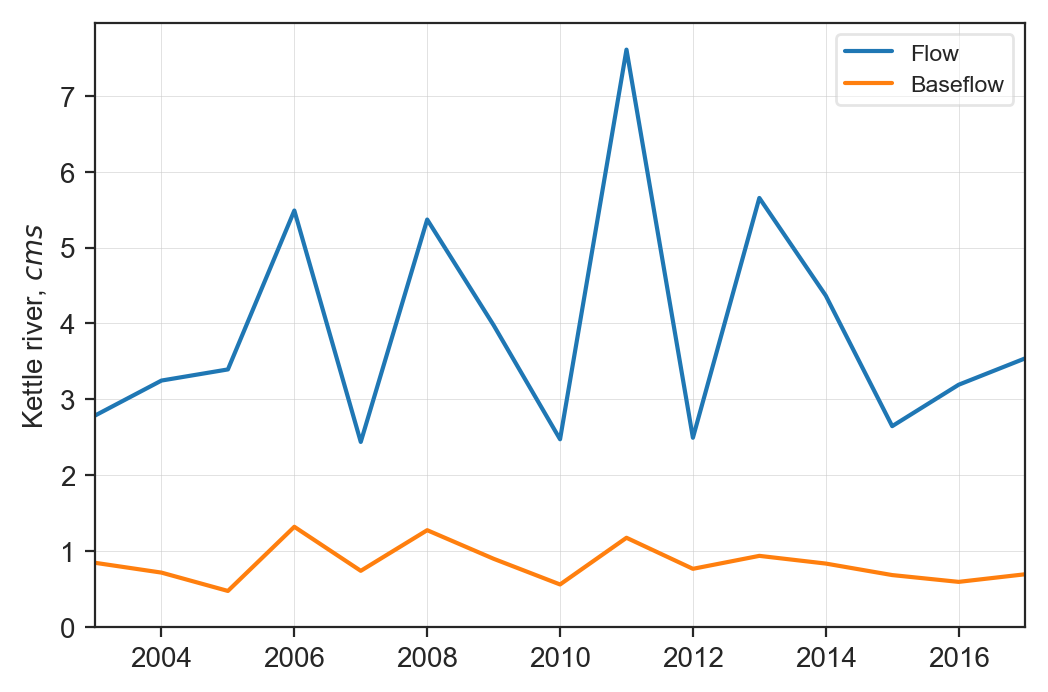

Grand OH river


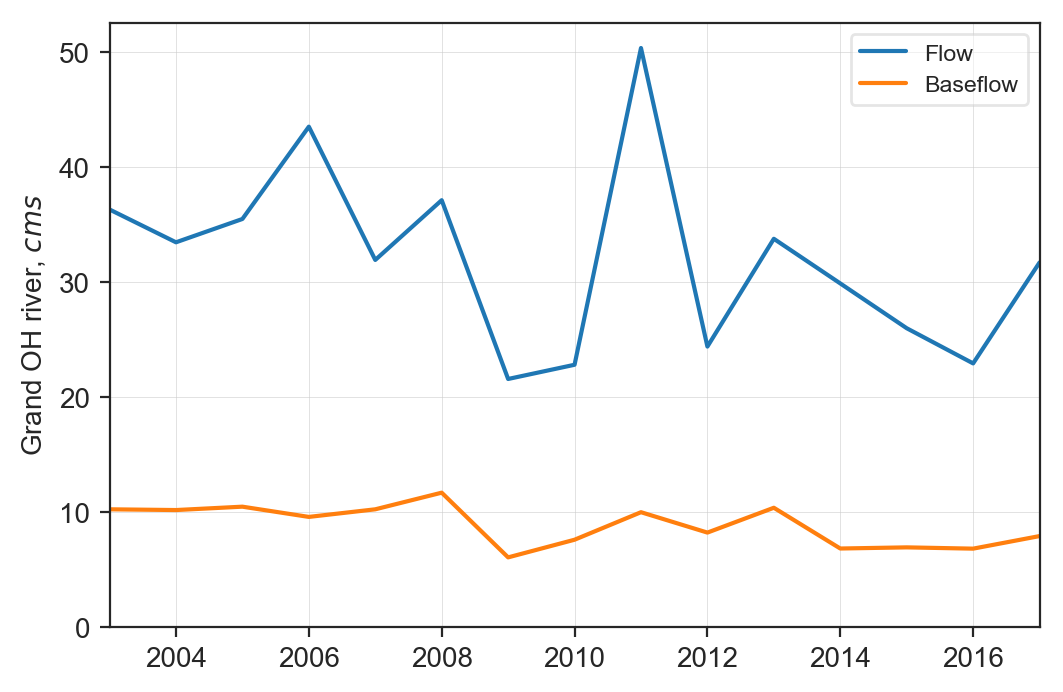

Cuyahoga river


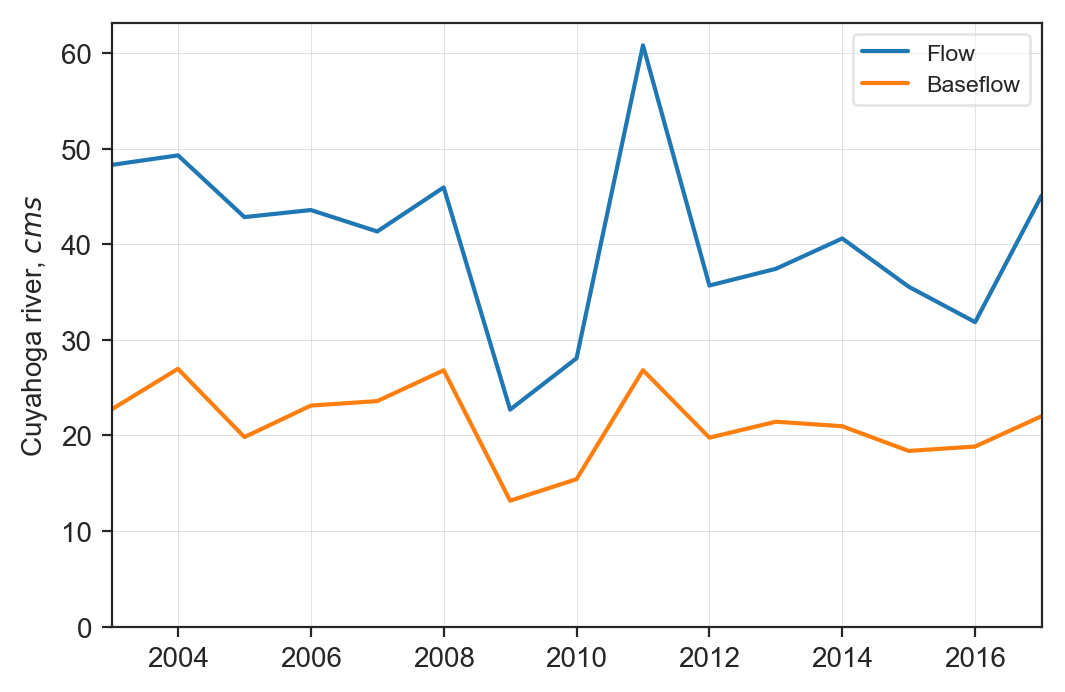

St Clair river


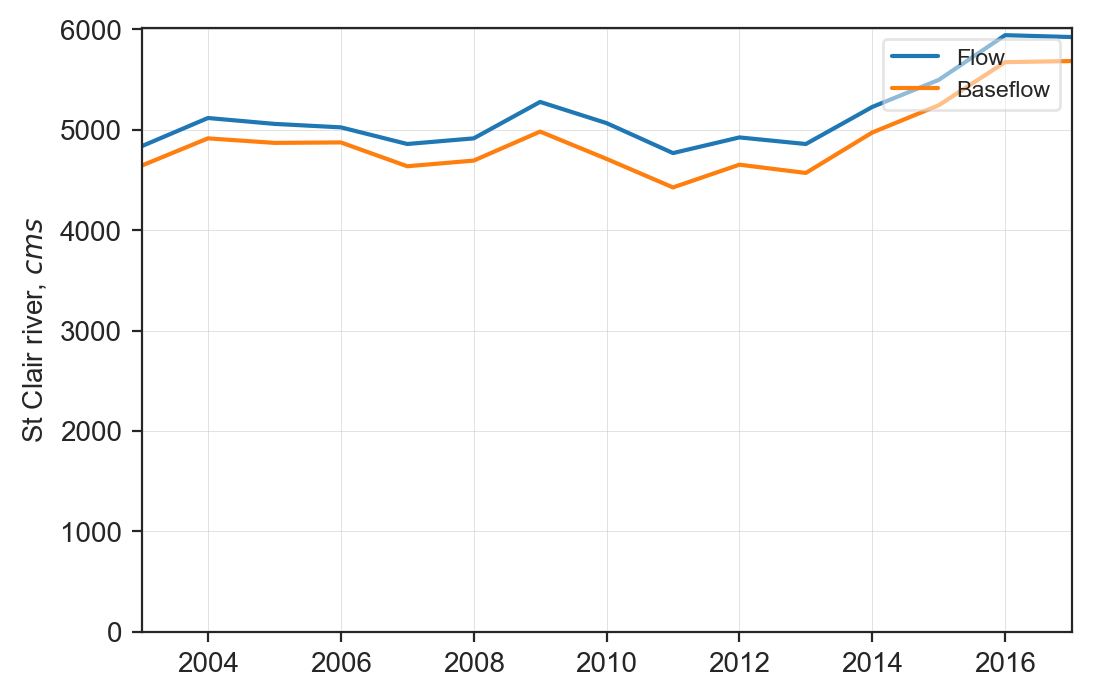

Conneaut river


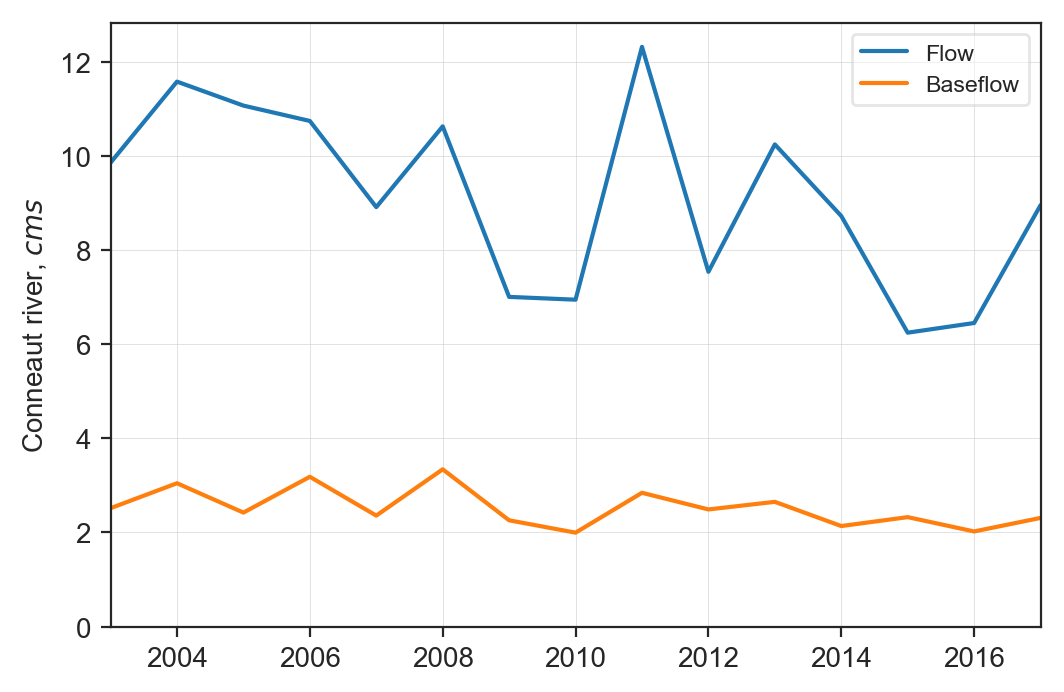

Buffalo river


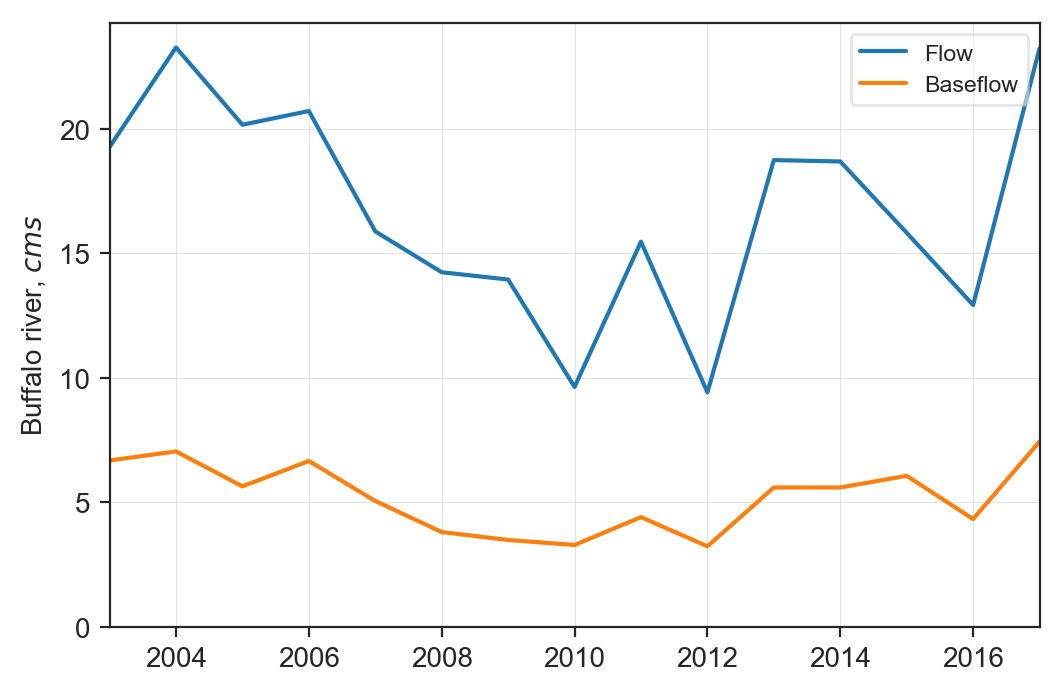

Sydenham river


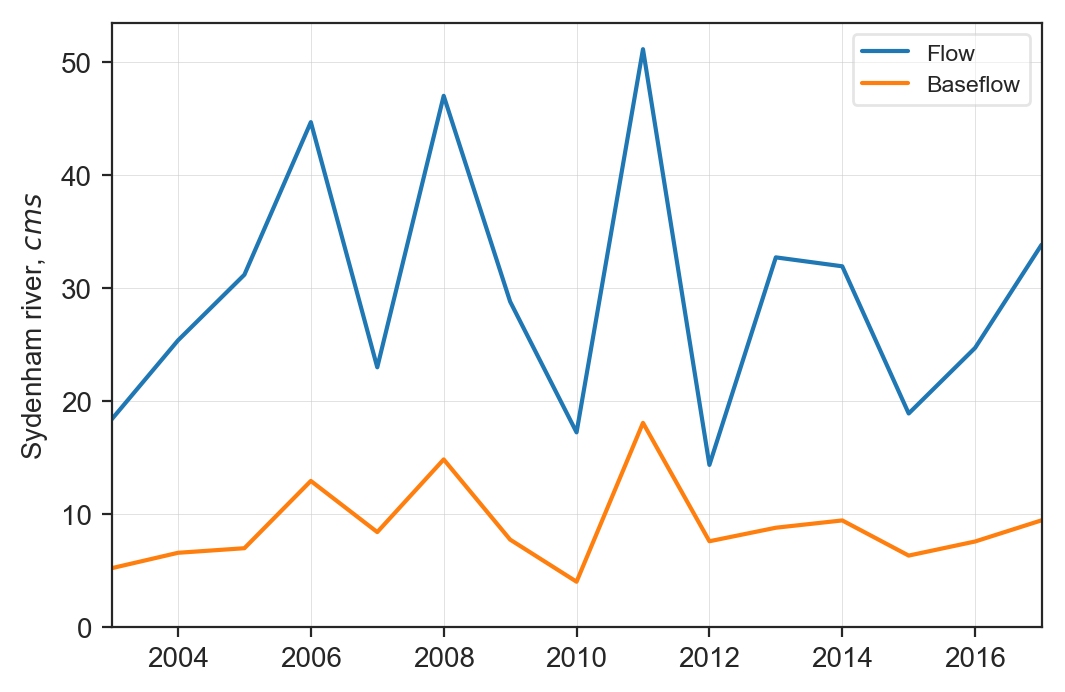

Lynn river


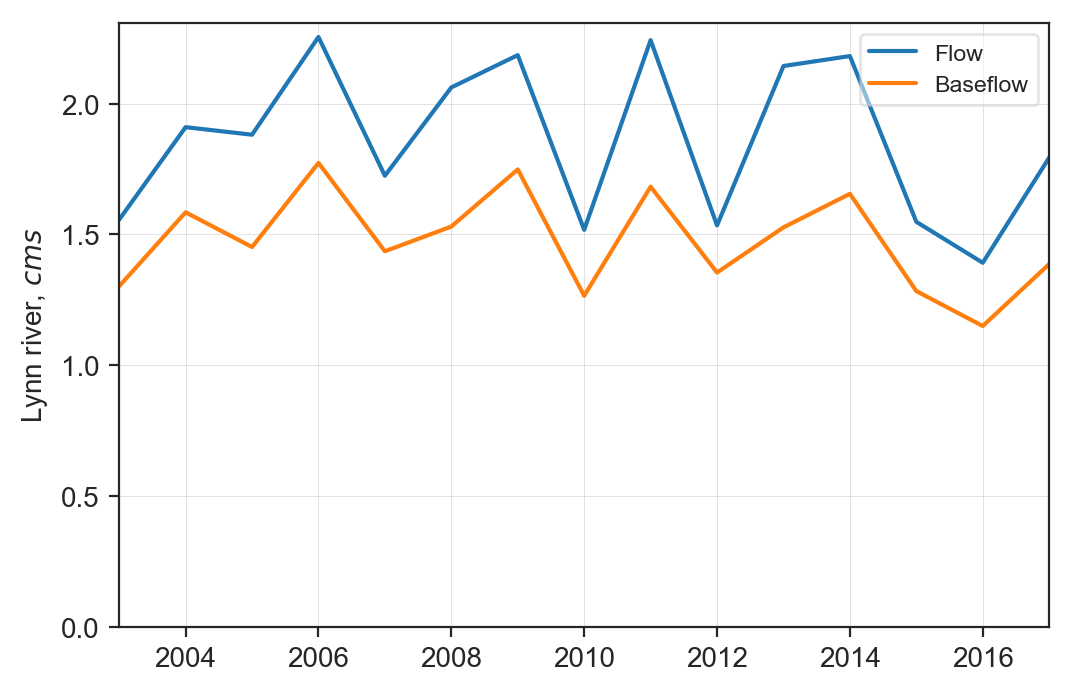

Black R river


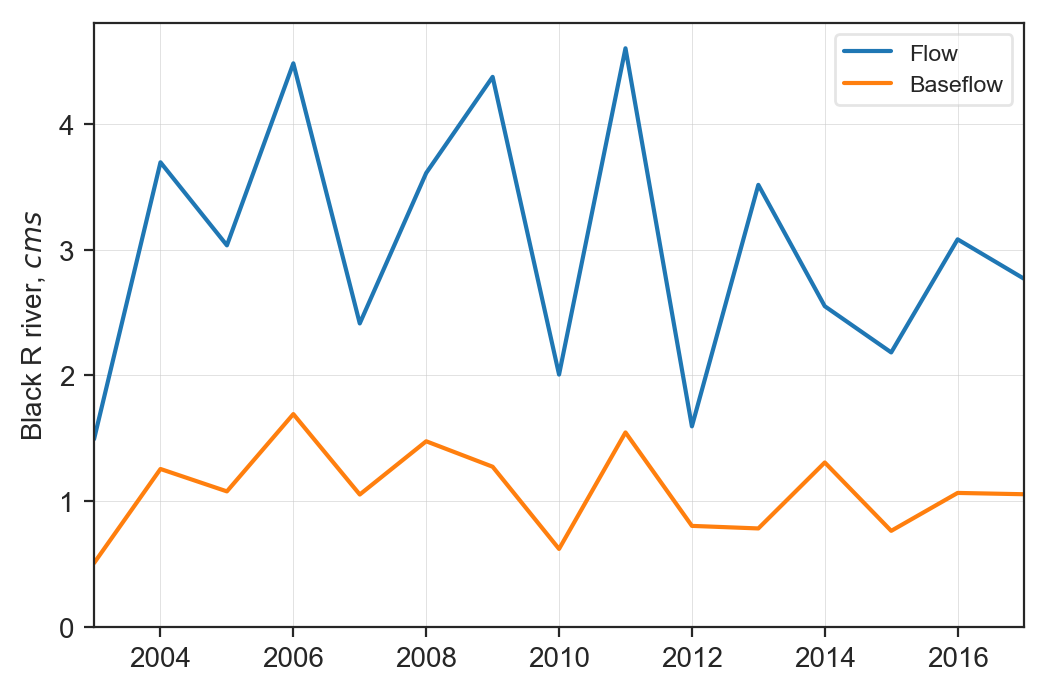

Maumee river


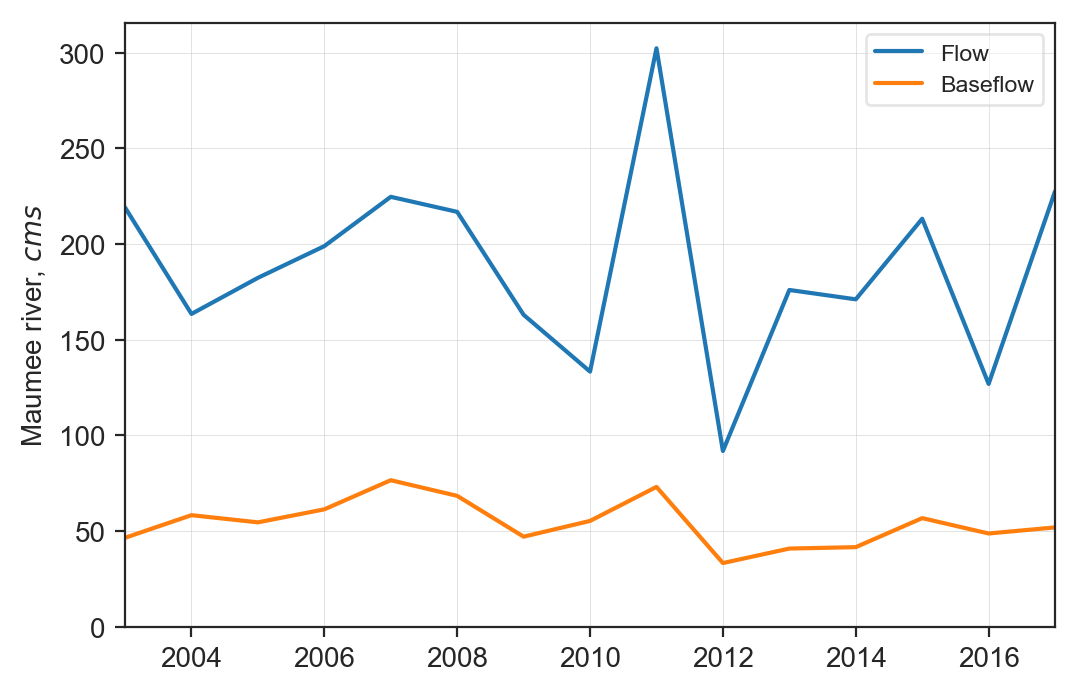

Ruscom river


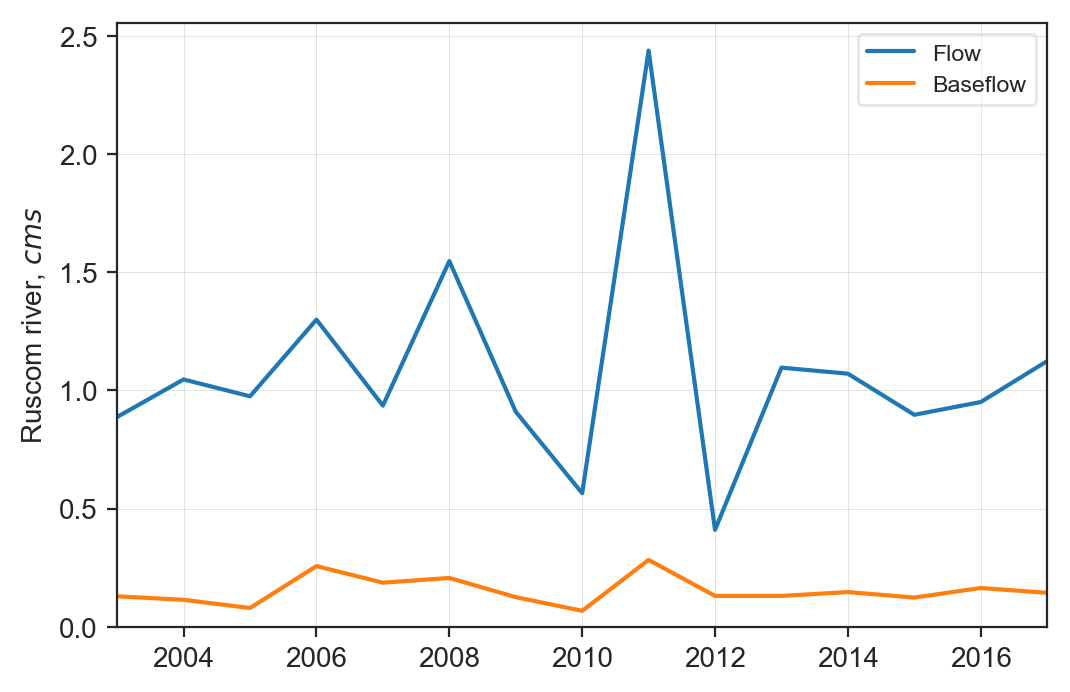

Canard river


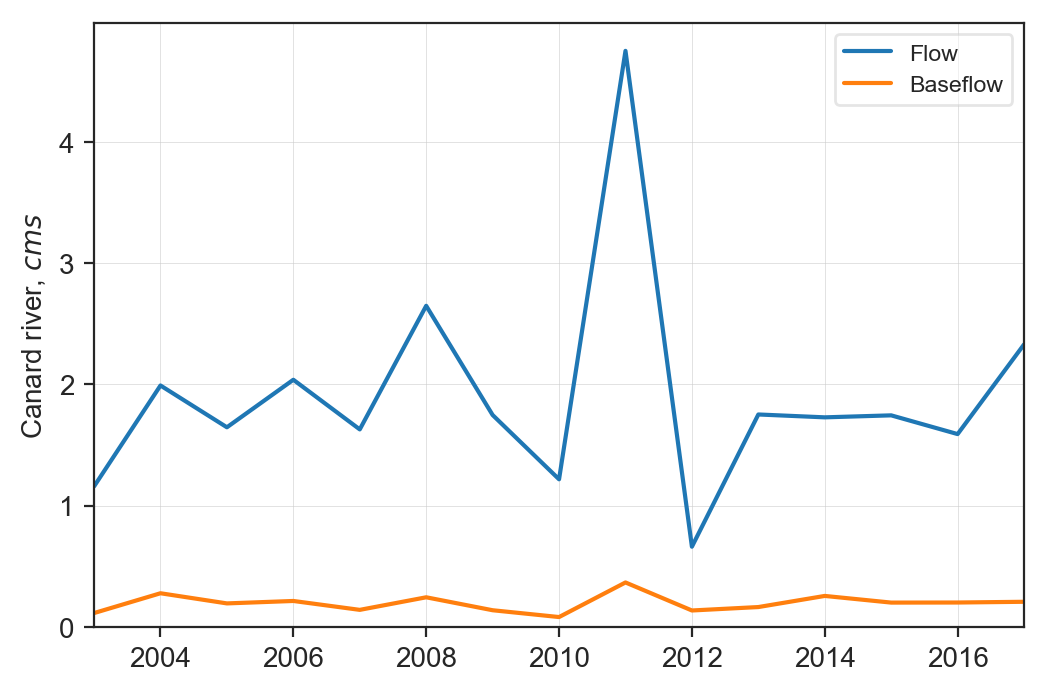

Chagrin river


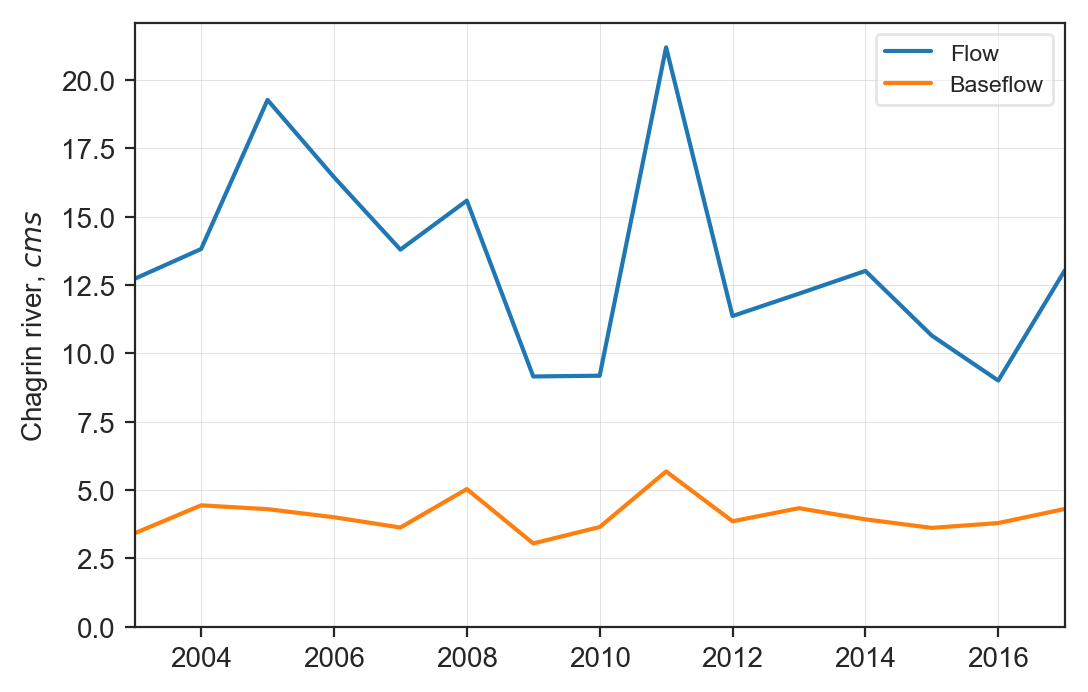

Portage river


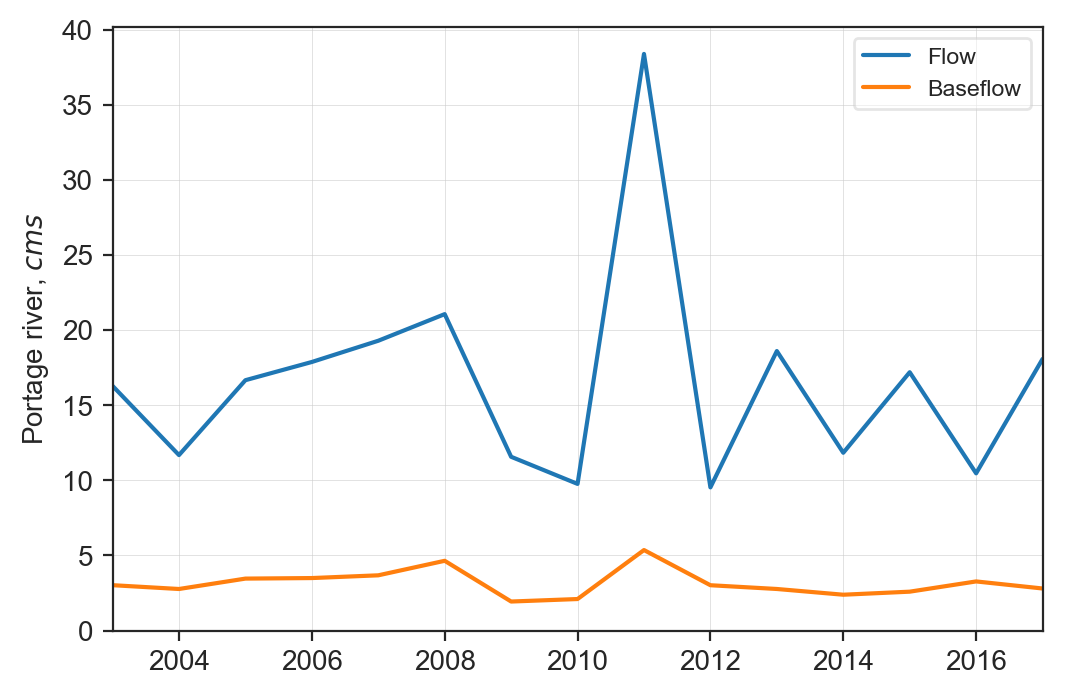

Big river


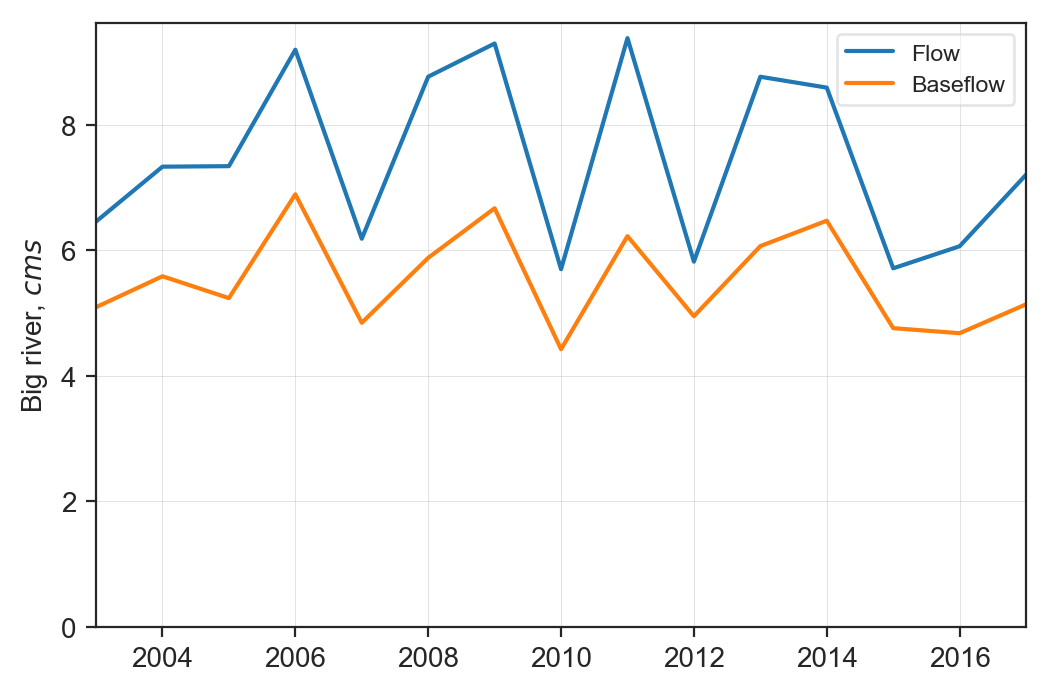

Thames river


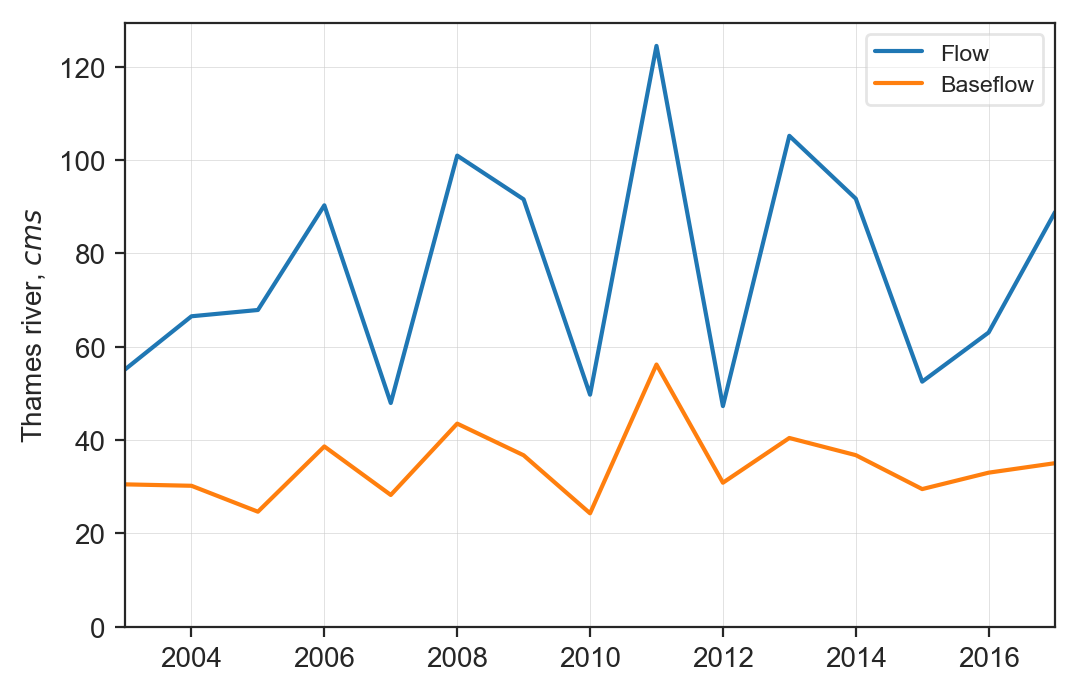

Raisin river


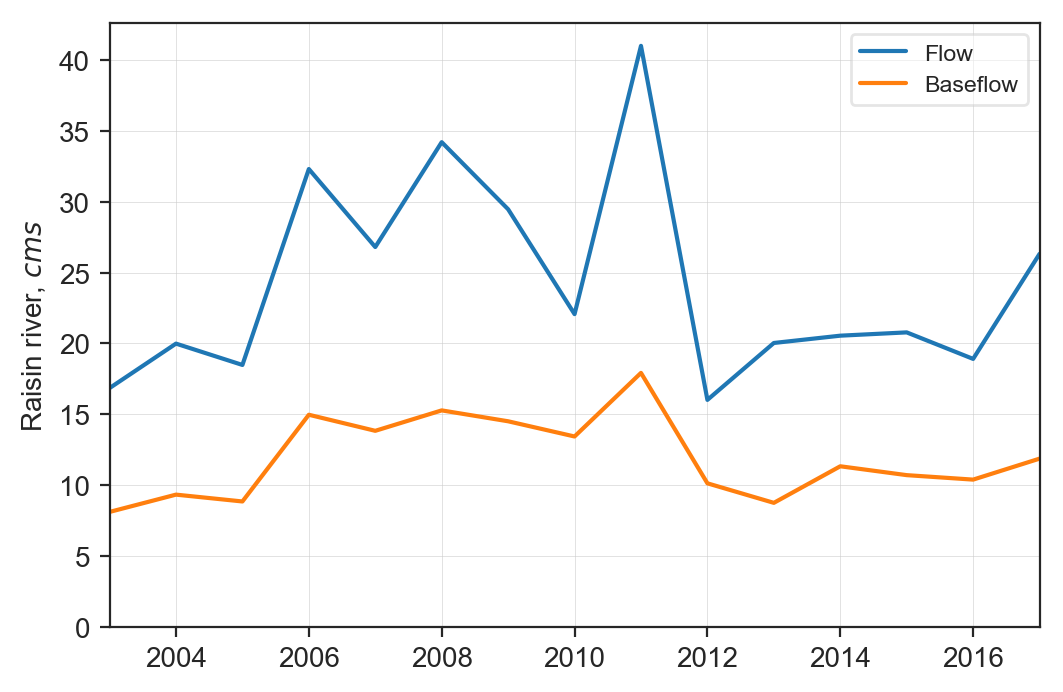

Vermilion river


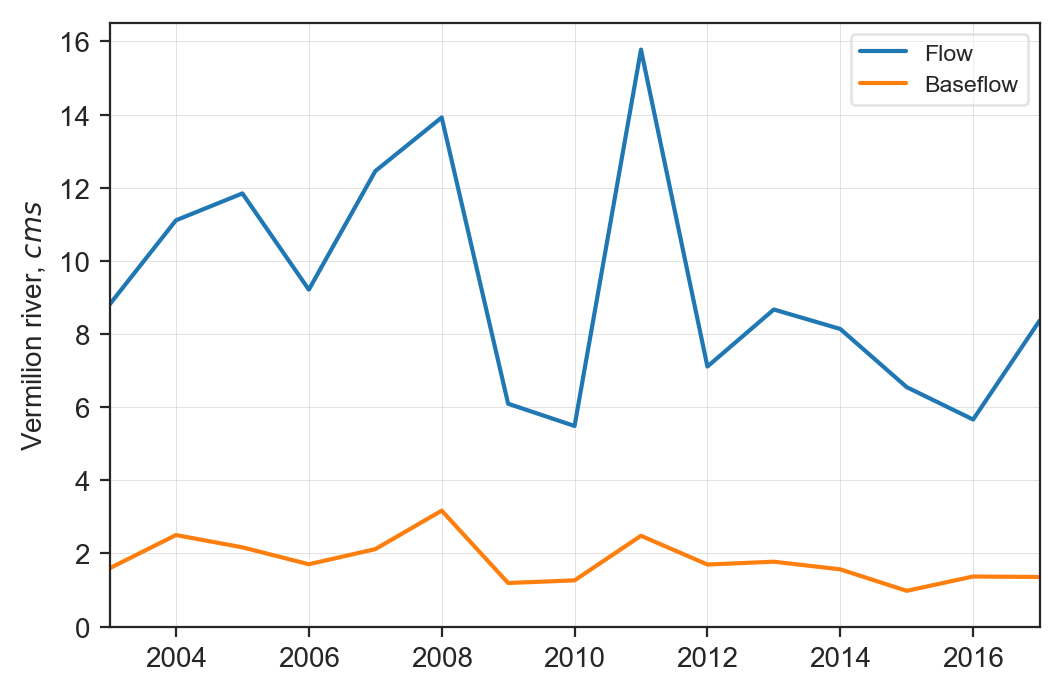

Detroit river


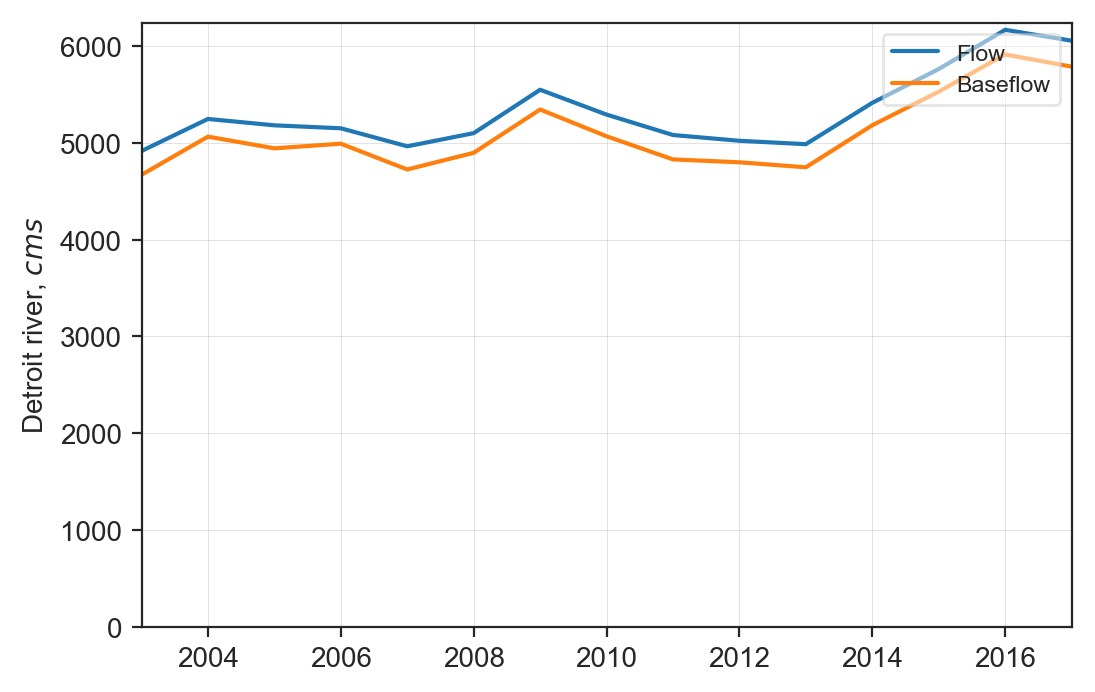

Belle river


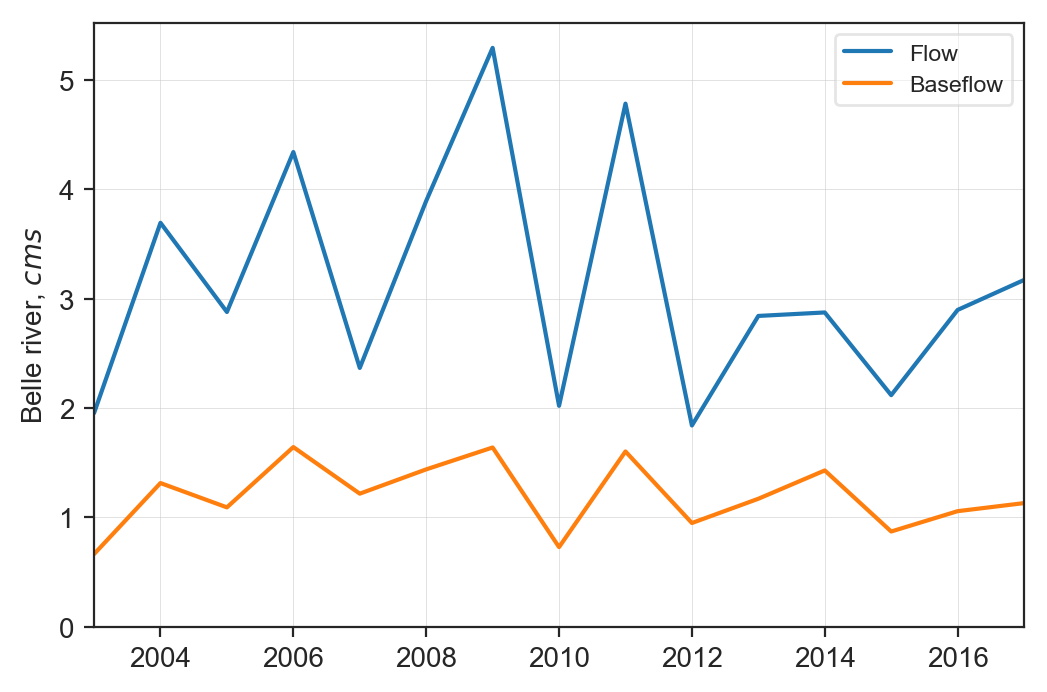

Rouge river


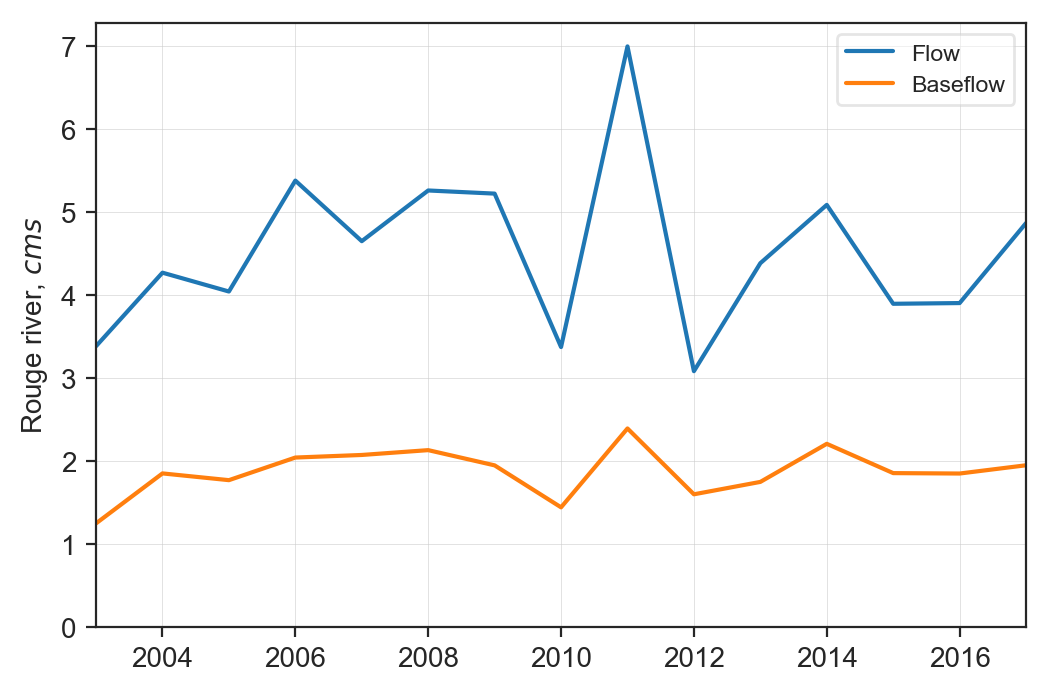

Big Otter river


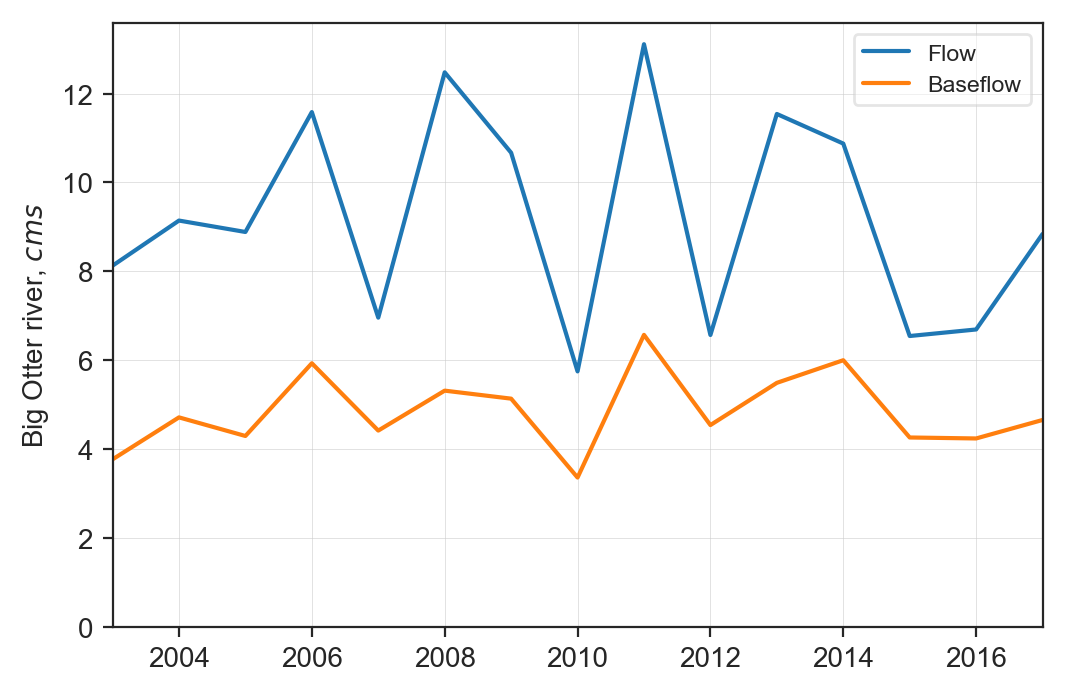

Niagara river


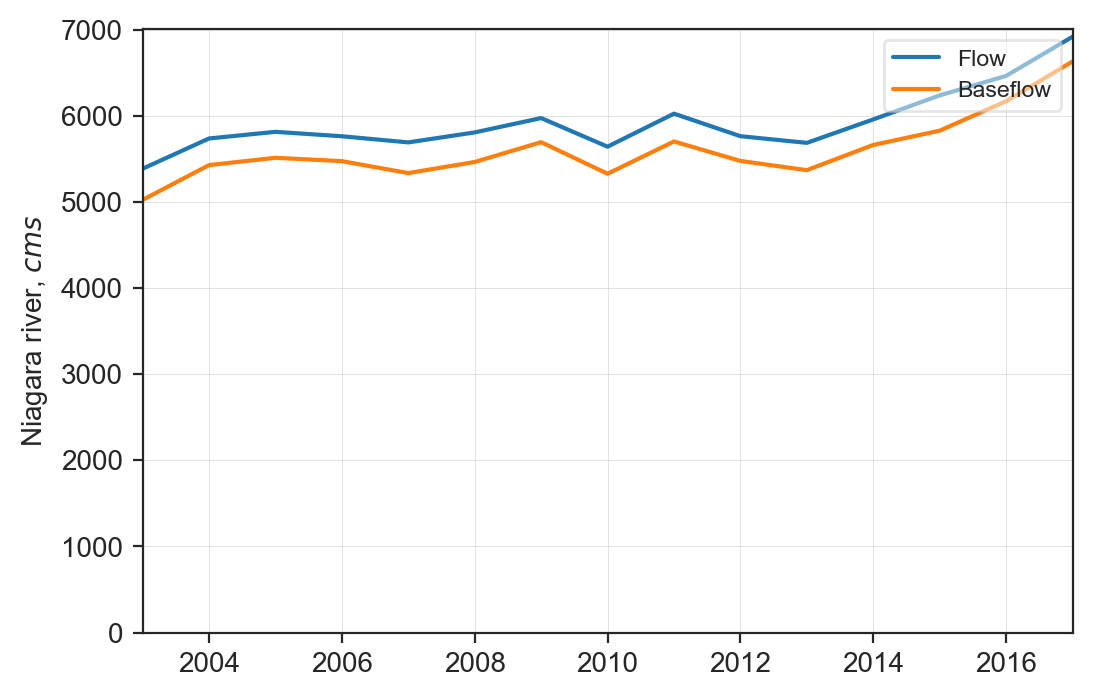

Rocky river


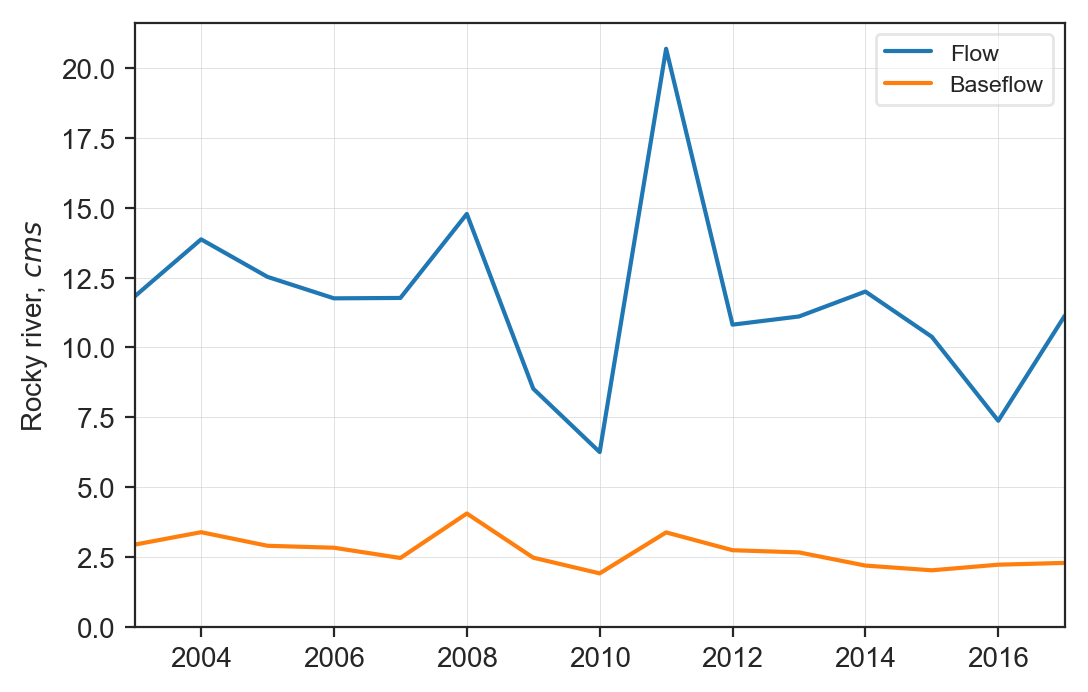

In [300]:
for c1, c2 in (zip(res_an.columns[::2], res_an.columns[1::2])):
    name = " ".join(c1.split("_")[:-2])+" river"
    print(name)
    c1_type = c1.split("_")[-1]
    c2_type = c2.split("_")[-1]
    f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True)
    axes.plot(res_an.index, res_an[c2], label=c2_type.title())
    axes.plot(res_an.index, res_an[c1], label=c1_type.title())
    axes.set_xlabel('')
    axes.grid(lw=0.2)
    axes.set_ylim(0,None)
    axes.set_xlim(2003,2017)
    axes.set_ylabel(name+', $cms$')
    axes.legend(loc=1,  bbox_transform=f.transFigure, frameon=1, framealpha=0.5, fontsize='small')
    plt.show()

In [8]:
river[(river.year>2002) & (river.year<2019)]

,Unnamed: 0,day,month,year,flow,hyear,baseflow
2557,2558,1,1,2003,255.00,2003,140.000000
2558,2559,2,1,2003,200.00,2003,145.000000
2559,2560,3,1,2003,180.00,2003,150.000000
2560,2561,4,1,2003,170.00,2003,155.000000
2561,2562,5,1,2003,160.00,2003,160.000000
2562,2563,6,1,2003,180.00,2003,155.826087
2563,2564,7,1,2003,210.00,2003,151.652174
2564,2565,8,1,2003,240.00,2003,147.478261
2565,2566,9,1,2003,298.00,2003,143.304348
2566,2567,10,1,2003,378.00,2003,139.130435


In [14]:
root = 'data/'
res_m = pd.DataFrame(columns=['month']).set_index('month')
for path, subdirs, files in os.walk(root):
    for name in files:
        if 'csv' in name and 'BaseFlow' in name:
#             print(os.path.join(path, name))
            river = pd.read_csv(os.path.join(path, name))
            river = river[(river.year>2002) & (river.year<2019)]
            river_m = river.groupby(['month']).mean()
            river_m['baseflow'] = river_m['baseflow']*0.028316847
            river_m['flow'] = river_m['flow']*0.028316847
            river_m = river_m[['baseflow', 'flow']]
            river_m = river_m[['baseflow']]
            river_m = river_m.rename(index=str, columns={'baseflow': name[9:-7]+'baseflow', 'flow': name[9:-7]+'flow'})
            res_m = res_m.merge(river_m, left_index=True, right_index=True, how='outer')

data/BaseFlow_Huron_OH_R_CFS.csv
data/BaseFlow_Huron_MI_R_CFS.csv
data/BaseFlow_Cattaraugus_R_CFS.csv
data/BaseFlow_Grand_R_CFS.csv
data/BaseFlow_Turkey_R_CFS.csv
data/BaseFlow_Nanticoke_R_CFS.csv
data/BaseFlow_Clinton_R_CFS.csv
data/BaseFlow_Sandusky_R_CFS.csv
data/BaseFlow_Black_OH_R_CFS.csv
data/BaseFlow_Kettle_R_CFS.csv
data/BaseFlow_Grand_OH_R_CFS.csv
data/BaseFlow_Cuyahoga_R_CFS.csv
data/BaseFlow_St_Clair_R_CFS.csv
data/BaseFlow_Conneaut_R_CFS.csv
data/BaseFlow_Buffalo_R_CFS.csv
data/BaseFlow_Sydenham_R_CFS.csv
data/BaseFlow_Lynn_R_CFS.csv
data/BaseFlow_Black_R_MI_CFS.csv
data/BaseFlow_Maumee_R_CFS.csv
data/BaseFlow_Ruscom_R_CFS.csv
data/BaseFlow_Canard_R_CFS.csv
data/BaseFlow_Chagrin_R_CFS.csv
data/BaseFlow_Portage_R_CFS.csv
data/BaseFlow_Big_R_CFS.csv
data/BaseFlow_Thames_R_CFS.csv
data/BaseFlow_Raisin_R_CFS.csv
data/BaseFlow_Vermilion_R_CFS.csv
data/BaseFlow_Detroit_R_CFS.csv
data/BaseFlow_Belle_R_CFS.csv
data/BaseFlow_Rouge_R_CFS.csv
data/BaseFlow_Big_Otter_R_CFS.csv
data/Bas

In [18]:
res_m.T.mean()

month
1     444.296156
2     436.226623
3     478.179617
4     493.200019
5     500.325755
6     497.662970
7     498.511199
8     490.840668
9     481.762527
10    480.491947
11    479.891876
12    478.508138
dtype: float64

In [20]:
res_m.T

month,1,2,3,4,5,6,7,8,9,10,11,12
Huron_OH_R_baseflow,4.876331,4.631989,6.188358,4.830710,3.631108,2.046270,1.299371,0.849090,0.744320,1.273538,2.319735,3.660244
Huron_MI_R_baseflow,11.664761,12.740415,18.888922,15.817964,14.784754,10.230610,5.763581,5.176385,5.258839,6.384836,10.514786,12.175996
Cattaraugus_R_baseflow,16.151096,13.919038,19.736900,17.944542,10.885199,7.006307,5.801864,4.958498,4.792251,7.538751,11.410300,16.051125
Grand_R_baseflow,38.396068,35.695679,52.475923,55.275919,38.431733,29.923341,25.564361,23.168598,23.757918,31.536092,40.383280,35.979700
Turkey_R_baseflow,0.097768,0.082063,0.094162,0.084839,0.103375,0.112717,0.092756,0.077642,0.083876,0.099836,0.103020,0.099989
Nanticoke_R_baseflow,1.277970,1.050707,1.709829,1.739822,1.156400,0.569892,0.290885,0.278613,0.250273,0.579003,0.932615,1.103003
Clinton_R_baseflow,11.964557,12.025132,16.818569,15.103012,12.576385,8.235169,5.278563,4.395584,4.781851,6.503667,9.078262,10.463134
Sandusky_R_baseflow,16.693504,10.776752,16.985458,13.832401,13.009853,7.838396,6.357230,3.107751,2.168516,3.072576,5.917913,11.318474
Black_OH_R_baseflow,3.923645,4.005052,5.989180,3.888250,2.449118,1.182068,1.000375,0.526842,0.474999,0.798191,1.685483,3.359304
Kettle_R_baseflow,1.172107,0.960940,1.812299,1.501612,0.861715,0.423586,0.235741,0.195243,0.189168,0.516548,0.904443,1.189379
